 ### Includes steps for loading the YOLO model, processing an image, performing object detection, and displaying the results.

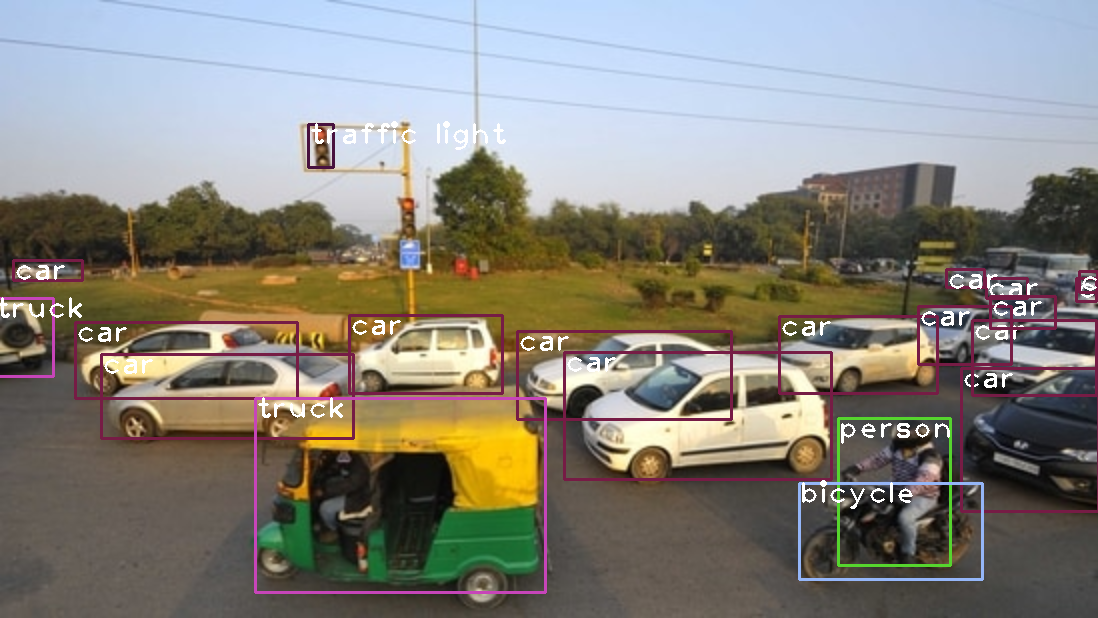

In [ ]:
# import cv2
# import numpy as np
# net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg.txt')

# classes = []
# with open('coco.names.txt', "r") as f:
#     classes = f.read().splitlines()

# img = cv2.imread('Lane.jpg')
# img = cv2.resize(img, None, fx=2.0, fy=2.0)
# font = cv2.FONT_HERSHEY_PLAIN
# colors = np.random.uniform(0, 255, size=(100, 3))

# height, width, _ = img.shape

# blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB=True, crop=False)
# net.setInput(blob)
# output_layers_names = net.getUnconnectedOutLayersNames()
# layerOutputs = net.forward(output_layers_names)

# boxes = []
# confidences = []
# class_ids = []

# for output in layerOutputs:
#     for detection in output:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.2:
#             center_x = int(detection[0]*width)
#             center_y = int(detection[1]*height)
#             w = int(detection[2]*width)
#             h = int(detection[3]*height)

#             x = int(center_x - w/2)
#             y = int(center_y - h/2)

#             boxes.append([x, y, w, h])
#             confidences.append((float(confidence)))
#             class_ids.append(class_id)

# indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)
# if len(indexes) > 0:
#     for i in indexes.flatten():
#         x, y, w, h = boxes[i]
#         label = str(classes[class_ids[i]])
#         confidence = str(round(confidences[i], 2))
#         color = colors[class_ids[i]]
#         cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
#         cv2.putText(img, label, (x, y+20), font, 2, (255, 255, 255), 2)

# cv2_imshow(img)
# key = cv2.waitKey(1)

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12788, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 12788 (delta 89), reused 84 (delta 39), pack-reused 12633
Receiving objects: 100% (12788/12788), 12.96 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (8803/8803), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 2.1 MB/s 


In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.7.14 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=

In [ ]:
!python detect.py --weights yolov5s.pt --hide-conf --source /content/Lane.jpg

detect: weights=['yolov5s.pt'], source=/content/Lane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-165-g966b0e0 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/Lane.jpg: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 2 traffic lights, 225.9ms
Speed: 2.1ms pre-process, 225.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


YOLOv3 Script: Loads an image, prepares it for the YOLOv3 model, performs object detection, applies non-maximum suppression to remove redundant boxes, and displays the image with bounding boxes and labels.

YOLOv5 Script: Clones the YOLOv5 repository, installs dependencies, and trains the YOLOv5 model using the COCO128 dataset.